In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train_data1 = pd.read_csv('Train.csv')
test_data1 = pd.read_csv('Test.csv')

In [9]:
print(train_data1.shape)
print(test_data1.shape)

(23856, 18)
(15903, 17)


In [10]:
train_data1.columns    # x12 = 182(train)   127(test)  null values

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [11]:
#test_data1[['INCIDENT_ID']].to_csv('sample_submission.csv',index = False)

In [12]:
train_data1.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


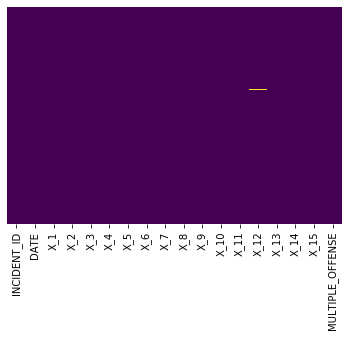

In [13]:
sns.heatmap(train_data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'most_frequent',axis = 0)
train_data1['X_12'] = imp.fit_transform(train_data1[['X_12']])
test_data1['X_12'] = imp.fit_transform(test_data1[['X_12']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
print(train_data1.isnull().values.sum())
print(test_data1.isnull().values.sum())

0
0


In [16]:
test_data1.dtypes

INCIDENT_ID     object
DATE            object
X_1              int64
X_2              int64
X_3              int64
X_4              int64
X_5              int64
X_6              int64
X_7              int64
X_8              int64
X_9              int64
X_10             int64
X_11             int64
X_12           float64
X_13             int64
X_14             int64
X_15             int64
dtype: object

In [17]:
train_data1.DATE = pd.to_datetime(train_data1.DATE)
test_data1.DATE = pd.to_datetime(train_data1.DATE)

In [18]:
train_data1.DATE.head()

0   2004-07-04
1   2017-07-18
2   2017-03-15
3   2009-02-13
4   2005-04-13
Name: DATE, dtype: datetime64[ns]

In [19]:
# train_data1['YEAR'] = train_data1.DATE.dt.year
# test_data1['YEAR'] = test_data1.DATE.dt.year

In [20]:
train_data1.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [21]:
test_data1.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,2004-07-04,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,CR_103520,2017-07-18,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,2017-03-15,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,2009-02-13,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,2005-04-13,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [22]:
train_data2 = train_data1.drop(columns=['INCIDENT_ID','DATE'], axis=1)
test_data2 = test_data1.drop(columns=['INCIDENT_ID','DATE'], axis=1)

In [23]:
test_data2.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [24]:
train_data2.to_csv('Final_train.csv',index=False)
test_data2.to_csv('Final_test.csv',index=False)